# Pymaceuticals Inc.
---

Background
A new pharmaceutical company that specializes in anti-cancer medications began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Findings
* There are correlation between Mouse Weight and the Tumor volume, tumor volume is higher with the increase of mouse weight. 
* 
 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

study_results = pd.read_csv(study_results_path)
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [66]:
# Combine the data into a single DataFrame - joining Mouse ID as the reference
data_combined = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice.
mice = data_combined["Mouse ID"].nunique()
mice

249

In [68]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_duplicates = data_combined.loc[data_combined.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
data_duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = data_combined.loc[(data_combined["Mouse ID"] == "g989")]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned = data_combined[data_combined["Mouse ID"].isin(data_duplicates) == False]
data_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.


248

In [71]:
# Checking the number of mice in the clean DataFrame.

final_total_mice = data_cleaned["Mouse ID"].nunique()
final_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = data_cleaned.groupby ("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_median = data_cleaned.groupby ("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_variance = data_cleaned.groupby ("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_sdev = data_cleaned.groupby ("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_sem = data_cleaned.groupby ("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame ({"Tumor Volume Mean:":drug_mean,
                             "Tumor Volume Median:":drug_median,
                             "Tumor Volume Variance:":drug_variance,
                             "Tumor Volume Standard Deviation:":drug_sdev,
                             "Tumor Volume SEM:":drug_sem})
drug_summary


,Tumor Volume Mean:,Tumor Volume Median:,Tumor Volume Variance:,Tumor Volume Standard Deviation:,Tumor Volume SEM:
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a "single line"


drug_summary_agg = data_cleaned.groupby (["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
drug_summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

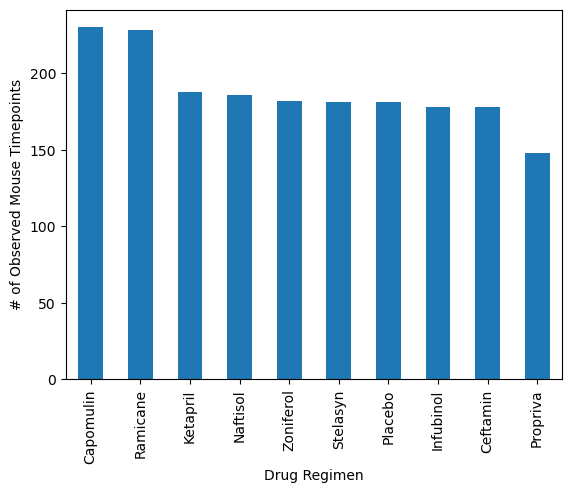

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


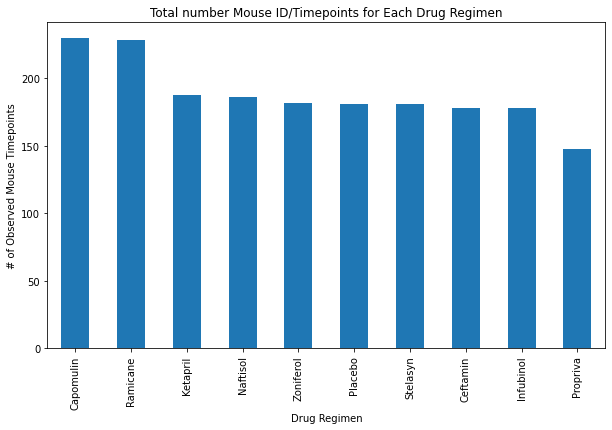

<Figure size 432x288 with 0 Axes>

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count mouse
count_mice_vs_drug = data_cleaned.groupby(["Drug Regimen"]).count()["Mouse ID"]
#count_mice_vs_drug

# Sorting out values into descending order
count_drug = count_mice_vs_drug.sort_values(ascending=False)
#count_drug

# Set width to 10 and height to 6
plt.figure(figsize=(10, 6))  

# Create graph
count_regimen = count_drug.plot(kind="bar")
count_regimen.set_title("Total number Mouse ID/Timepoints for Each Drug Regimen")
count_regimen.set_xlabel("Drug Regimen")
count_regimen.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()


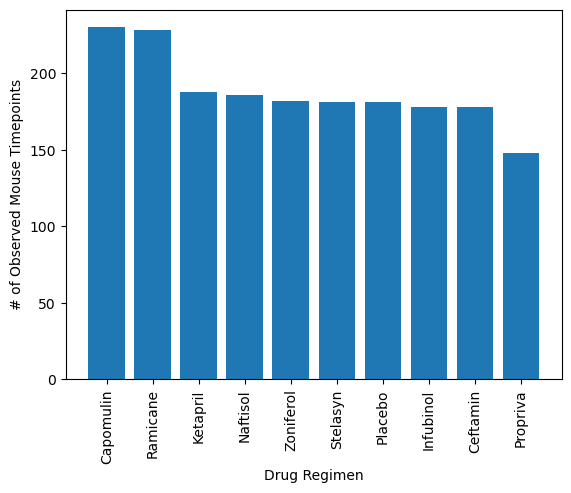

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


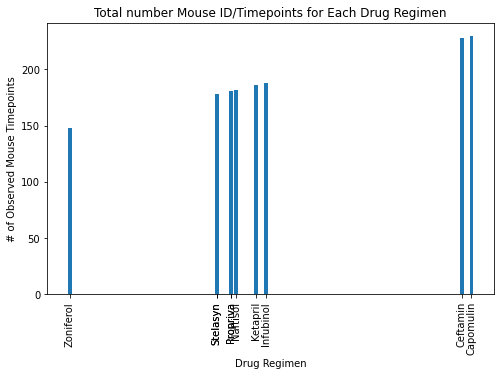

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set x and y axis
#x_axis = np.arrange(len(count_drug)) ==> AttributeError: module 'numpy' has no attribute 'arrange'
#y_axis = count_drug


#tick = list (count_drug.index.values)
#tick_location = [value for value in x_axis]

# Set width to 10 and height to 6
plt.figure(figsize=(8, 5))

# Create graph
plt.bar(x_axis,y_axis)
plt.xticks(tick_location, tick, rotation="90")
plt.title("Total number Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
#plt.tight_layout()


In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender_data = pd.DataFrame(data_cleaned["Sex"].value_counts())
mice_gender_data

,Sex
Male,958
Female,922


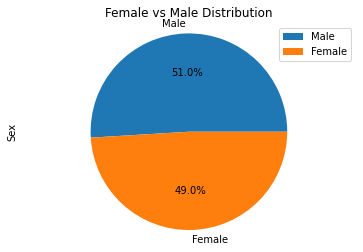

In [121]:
mice_gender_data.plot(
    kind="pie", 
    y="Sex", 
    title=("Female vs Male Distribution"), 
    autopct="%1.1f%%")
plt.axis("equal")
plt.show()

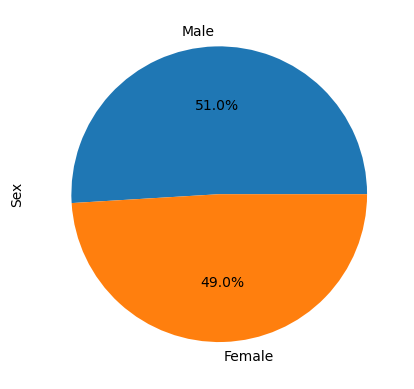

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = data_cleaned.groupby(["Mouse ID"])["Timepoint"].max()
timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [124]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_merge = pd.merge(timepoint, data_cleaned, on=(["Mouse ID", "Timepoint"]))
data_merge


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [132]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]  

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = data_merge.loc[data_merge["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(volume)
    
quartile = volume.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper-lower
    
# Determine outliers using upper and lower bounds
lower_bound = lower-(1.5*iqr)
upper_bound = upper+(1.5*iqr)
outliers=volume.loc[(volume>upper_bound) | (volume<lower_bound)] 

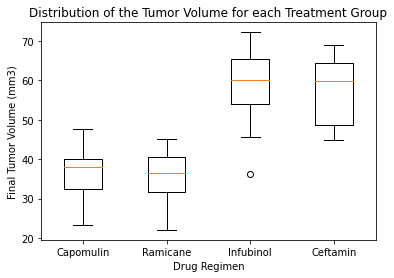

In [133]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of the Tumor Volume for each Treatment Group")
plt.boxplot(tumor_vol_data, labels = treatment)
plt.show()

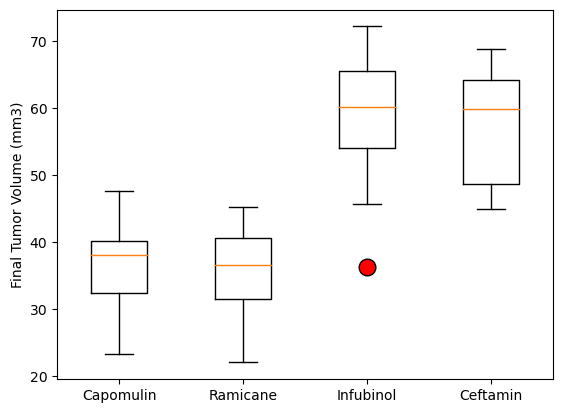

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

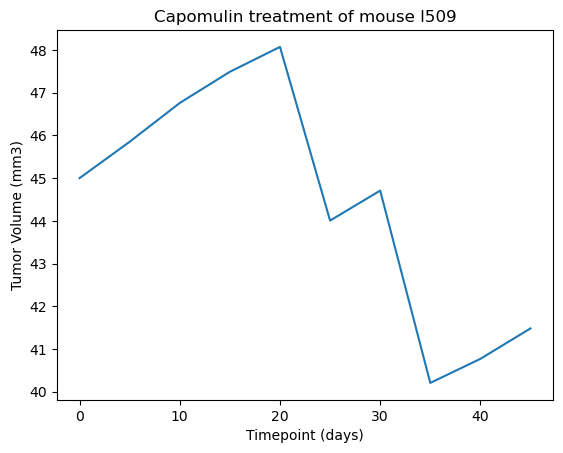

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


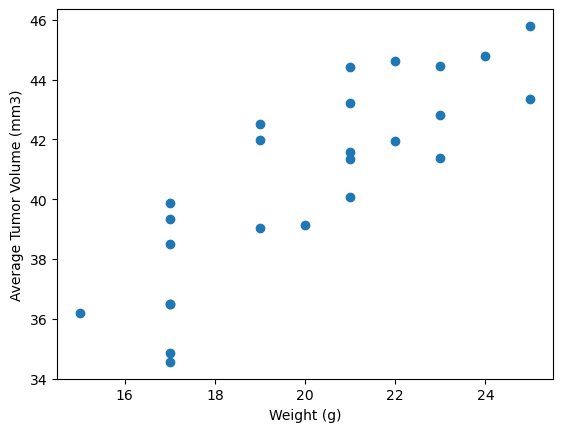

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


In [134]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_list = data_cleaned.loc[data_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_list.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


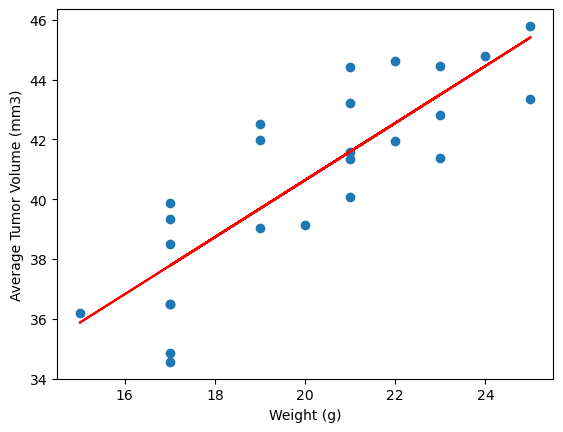

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
